# Cmpe462 - Project 2
## Çağatay Doruk Balcı - Uras Varolgüneş

# 2015300000 - 2015300210

# Question 1 & 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import random
from itertools import product
%matplotlib inline

In [2]:
# You can change the sample size and K parameters as desired. You can also adjust the omega and x variables.
K=2
size=50
om = np.random.rand(K)*4*np.pi
x= np.linspace(0.01,2,size)
def make_design_matrix(x, om):
    sin = []
    cos = []
    for i in range(K):
        p = np.array(np.sin(x * om[i]))
        r = np.array(np.cos(x * om[i]))
        sin.append(p)
        cos.append(r)
    sin = np.transpose(sin)
    cos = np.transpose(cos)
    x = np.reshape(x,(size,1))
    A = np.hstack((x,sin,cos))
    return A
A= make_design_matrix(x,om)

In [3]:
# Create the theta vector here. (it is filled in for demonstration)
# y values are created using theta and the design matrix. Then add white noise to the data.
th = np.random.randn(len(om)*2+1)
y = np.matmul(A,th)
y = np.reshape(y,(size,1))
wn = np.random.standard_normal([size,1]) * 0.05
y = y + wn

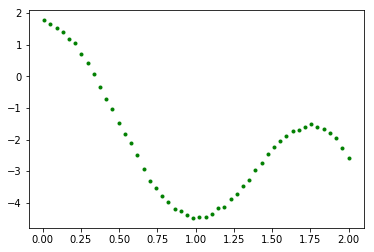

In [4]:
plt.plot(x,y,"g.")

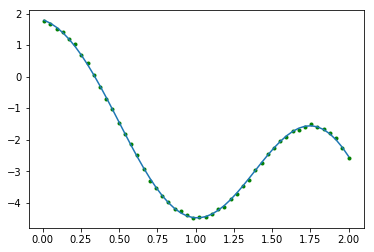

In [5]:
# Define the least squares function. Plot the data along with the fitted values.
def least_squares(A,y):
    solution = np.linalg.lstsq(A,y)
    return solution[0] 
plt.plot(x,y,"g.")
th_hat = least_squares(A, y)
y_hat = np.matmul(A,th_hat)
plt.plot(x,y_hat)

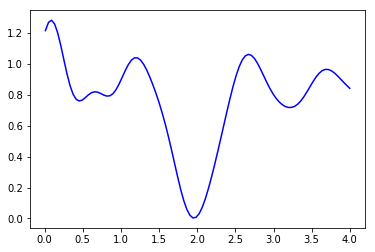

In [18]:
# First, solve to get the optimal theta for a given omega. Then plot the error for different omegas.
K=1
size=50
om = np.random.rand(K)*4*np.pi
x= np.linspace(0,2,50)
A = make_design_matrix(x, om)
theta = np.random.randn(len(om)*2+1)
y = np.matmul(A,theta)
y = np.reshape(y,(size,1))
wn = np.random.standard_normal([size,1]) * 0.01
y = y + wn
theta_hat = least_squares(A,y)
omega_list = np.linspace(0.01, 4, 100)
EE=np.zeros((100,1))
for i in range(len(omega_list)):
    A= make_design_matrix(x,np.array([omega_list[i]])*np.pi)
    y_hat = np.matmul(A, theta_hat)
    e = y - y_hat
    e2 = np.matmul(e.T,e)*0.5
    EE[i]=e2
plt.plot(omega_list ,EE, 'b')

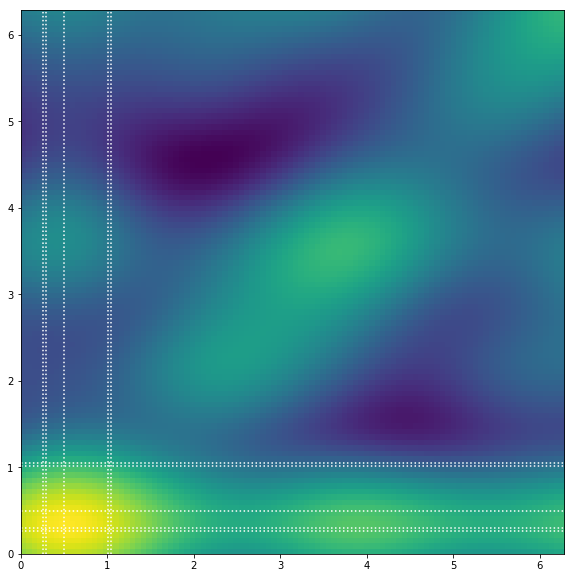

In [19]:
# First, solve to get the optimal theta for a given omega for K=2. Compute the errors for different omega combinations.
# Then plot the error surface.
size=50
K=2
x= np.linspace(0.01, 2,size)
om = np.random.rand(K)*4*np.pi
A = make_design_matrix(x, om)
theta = np.random.rand(len(om)*2+1)*2
y = np.matmul(A,theta)
y = np.reshape(y,(size,1))
wn = np.random.standard_normal([size,1]) * 0.01
y = y + wn
theta_hat = least_squares(A,y)
OM = np.linspace(0.00,2,100)*np.pi
EE = np.zeros((len(OM),len(OM)))
for i,omega1 in enumerate(OM):
    for j,omega2 in enumerate(OM):
        X= make_design_matrix(x,np.array([omega1,omega2]))
        y_hat = np.matmul(X, theta_hat)
        e = y - y_hat
        e2 = np.matmul(e.T,e)**0.5
        EE[i,j]=e2
        
# These lines are for plotting purposes
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE), extent=(l,r,l,r), interpolation='nearest', origin='lower')
for o in theta:
    plt.axvline(o, color='w',ls=':')
    plt.axhline(o, color='w',ls=':')    
plt.show()

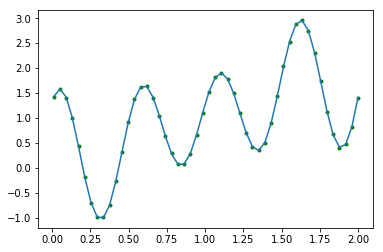

In [20]:
plt.plot(x,y,'.g')
plt.plot(x,np.matmul(A,theta_hat))

In [21]:
def model_func(x, theta, omega):
    y_hat = (theta[0]* x) + (theta[1] * np.sin(omega[0] * x)) +(theta[2] * np.sin(omega[1] *x)) + (theta[3] * np.cos(omega[0] * x)) + (theta[4] * np.cos(omega[1] * x))
    return y_hat
def grad_func(y,x,theta,omega):    
    cost = y - model_func(x,theta,omega)
    grad_m = -cost * x
    grad_a1 = -cost * np.sin(omega[0]*x)
    grad_a2 = -cost * np.sin(omega[1]*x)
    grad_b1 = -cost * np.cos(omega[0]*x)
    grad_b2 = -cost * np.cos(omega[1]*x)
    grad_om1 = -cost * ((theta[1]*np.cos(omega[0]*x)*x) - (theta[3]*np.sin(omega[0]*x)*x))
    grad_om2 = -cost * ((theta[2]*np.cos(omega[1]*x)*x) - (theta[4]*np.sin(omega[1]*x)*x))
    grads = np.array([grad_m[0],grad_a1[0],grad_a2[0],grad_b1[0],grad_b2[0],grad_om1[0],grad_om2[0]])
    
    return grads

In [22]:
from random import shuffle
x_shuf = []
y_shuf = []
index_shuf = list(range(size))
shuffle(index_shuf)
for i in index_shuf:
    x_shuf.append(x[i])
    y_shuf.append(y[i])  

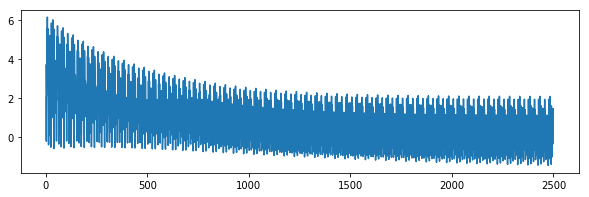

In [23]:
K_try = 2
# Initialize
lr = 0.001
om = np.random.rand(K_try)*np.pi
th = np.random.randn(len(om)*2+1)

ERR = []
OM_PATH = []
MAX_EPOCH = 50
for epoch in range(MAX_EPOCH):
    for  i in range(size):
        y_hat = model_func(x_shuf[i],th,om)
        grads= grad_func(y[i],x_shuf[i],th,om)
        th[0] = th[0] - lr*grads[0]
        th[1] = th[1] - lr*grads[1]
        th[2] = th[2] - lr*grads[2]
        th[3] = th[3] - lr*grads[3]
        th[4] = th[4] - lr*grads[4]
        om[0] = om[0] - lr*grads[5]
        om[1] = om[1] - lr*grads[6]
        new_om = list(om)
        ERR.append(y_shuf[i] -y_hat)
        OM_PATH.append(new_om)
# PLot the error as a function of iteratation
plt.figure(figsize=(10,3))
plt.plot(ERR)

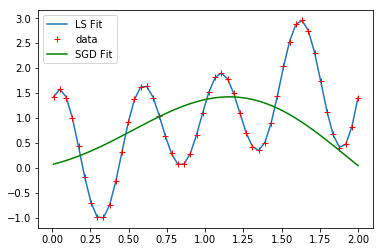

In [24]:
y_hat_ls = np.matmul(A,theta_hat)
plt.plot(x,y_hat_ls, label = 'LS Fit')
B = make_design_matrix(x,om)
y_hat_sgd = np.matmul(B,th)
plt.plot(x,y,'r+',label='data')
plt.plot(x,y_hat_sgd,'g',label='SGD Fit')
plt.legend(loc='best')

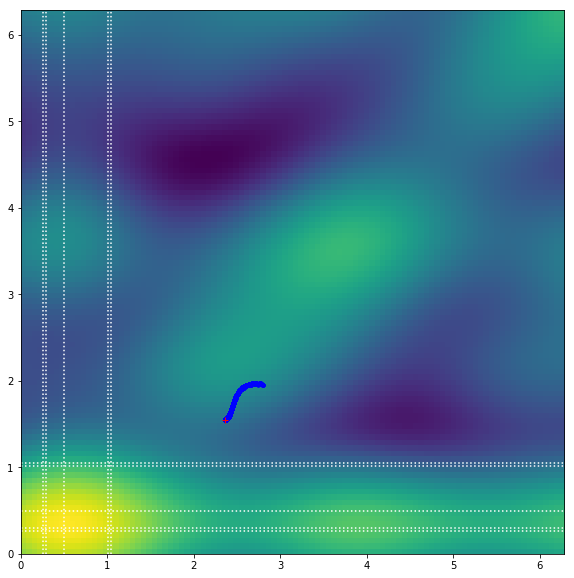

In [25]:
OM = np.linspace(0.00,2,100)*np.pi
EE = np.zeros((len(OM),len(OM)))
for i,omega1 in enumerate(OM):
    for j,omega2 in enumerate(OM):
        A2= make_design_matrix(x,np.array([omega1,omega2]))
        y_hat = np.matmul(A2, theta_hat)
        e = y - y_hat
        e2 = np.matmul(e.T,e)**0.5
        EE[i,j]=e2
        
# These lines are for plotting purposes
l = min(OM)
r = max(OM)
plt.figure(figsize=(10,10))
plt.imshow(np.log(EE), extent=(l,r,l,r), interpolation='nearest', origin='lower')
for o in theta:
    plt.axvline(o, color='w',ls=':')
    plt.axhline(o, color='w',ls=':')
for i in range(len(OM_PATH)):
    plt.plot(OM_PATH[i][0],OM_PATH[i][1],'.b')
plt.plot(om[0],om[1],'r+')    
plt.show()

# Question 3

In [1090]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

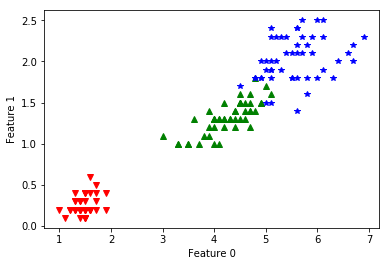

In [1091]:
'''
Only adjust the first two lines of the code.
Load your data set into the variable 'dataset'. Then choose two features to construct the X matrix and store the
corresponding labels into the variable 'c'. The rest of the code will provide the desired output.
The example below demonstrates how to use the program.
'''
dataset = datasets.load_iris()
X, c = dataset['data'][:,2:], dataset['target']
big_data=np.column_stack([X,c])
N, M = X.shape

classes = list(np.unique(c))
markers=['v','^','*','H','+','x','X','D','d','|','_']
colors=['r','g','b','k','y','m']
class_shapes = list()
class_colors = list()
for i in range(N):
    class_shapes.append(markers[classes.index(c[i])])
    class_colors.append(colors[classes.index(c[i])])
for j in range(N):
    plt.plot(X[j,0],X[j,1], class_shapes[j], color = class_colors[j])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

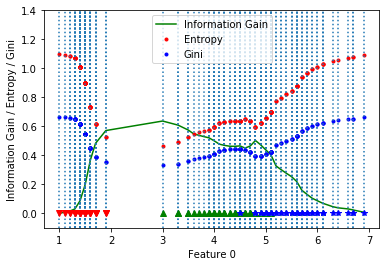

In [1092]:
entropy = list()
gini = list()
info_gain = list()
class_list = np.unique(c)
p=list()
for i in class_list:
    p.append(len(big_data[big_data[:,2] == i])/len(c))
begin_entropy = -np.sum(p*np.log(p))
for tau in X[:,0]:
    left = big_data[big_data[:,0]<tau]
    right = big_data[big_data[:,0]>= tau]
    left_class = left[:,2]
    right_class= right[:,2]
    left_class = list(set(left_class))
    right_class = list(set(right_class))
    p_left = []
    p_right = []
    
    for i in left_class:
        p_left.append(len(left[left[:,2]== i])/len(left))
    for i in right_class:
        p_right.append(len(right[right[:,2]== i])/len(right))
    left_entropy = -np.sum(p_left*np.log(p_left))
    right_entropy = -np.sum(p_right*np.log(p_right))
    left_gini = 1 -np.sum(np.asarray(p_left)**2)
    right_gini = 1 -np.sum(np.asarray(p_right)**2)
        

    entropy.append((len(left)/N)*left_entropy + (len(right)/N)*right_entropy)
    gini.append((len(left)/N)*left_gini + (len(right)/N)*right_gini)
for i in entropy:
    info_gain.append(begin_entropy-i)

#x_with_ig is created for plotting purposes.
x_with_ig = np.column_stack([X,info_gain])
x_with_ig = x_with_ig[x_with_ig[:,0].argsort()]

plt.plot(x_with_ig[:,0], x_with_ig[:,2], 'g')
for i in range(N):
    plt.plot(X[i,0], entropy[i], '.r')
    plt.plot(X[i,0], gini[i], '.b')
    plt.axvline(x=X[i,0], ls=":")    
    plt.plot(X[i,0],0, class_shapes[i], color = class_colors[i])

plt.xlabel('Feature 0')
plt.ylabel('Information Gain / Entropy / Gini')
plt.ylim([-0.1,1.4])
plt.legend(['Information Gain','Entropy','Gini'])
plt.show()

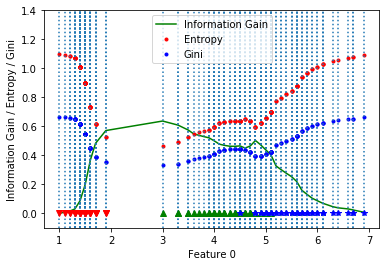

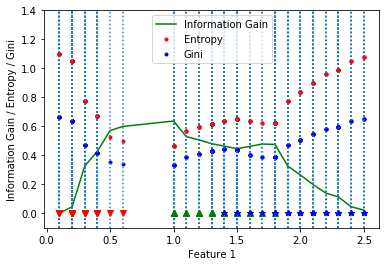

In [1093]:
for feature_no in range(M):
    entropy = list()
    gini = list()
    info_gain = list()
    class_list = np.unique(c)
    p=list()
    for i in class_list:
        p.append(len(big_data[big_data[:,2] == i])/len(c))
    begin_entropy = -np.sum(p*np.log(p))
    for tau in X[:,feature_no]:
        left = big_data[big_data[:,feature_no]<tau]
        right = big_data[big_data[:,feature_no]>= tau]
        left_class = left[:,2]
        right_class= right[:,2]
        left_class = list(set(left_class))
        right_class = list(set(right_class))
        p_left = []
        p_right = []

        for i in left_class:
            p_left.append(len(left[left[:,2]== i])/len(left))
        for i in right_class:
            p_right.append(len(right[right[:,2]== i])/len(right))
        left_entropy = -np.sum(p_left*np.log(p_left))
        right_entropy = -np.sum(p_right*np.log(p_right))
        left_gini = 1 -np.sum(np.asarray(p_left)**2)
        right_gini = 1 -np.sum(np.asarray(p_right)**2)


        entropy.append((len(left)/N)*left_entropy + (len(right)/N)*right_entropy)
        gini.append((len(left)/N)*left_gini + (len(right)/N)*right_gini)
    for i in entropy:
        info_gain.append(begin_entropy-i)

    #x_with_ig is created for plotting purposes.
    x_with_ig = np.column_stack([X,info_gain])
    x_with_ig = x_with_ig[x_with_ig[:,feature_no].argsort()]

    plt.plot(x_with_ig[:,feature_no], x_with_ig[:,2], 'g')
    for i in range(N):
        plt.plot(X[i,feature_no], entropy[i], '.r')
        plt.plot(X[i,feature_no], gini[i], '.b')
        plt.axvline(x=X[i,feature_no], ls=":")    
        plt.plot(X[i,feature_no],0, class_shapes[i], color = class_colors[i])

    plt.xlabel('Feature '+str(feature_no))
    plt.ylabel('Information Gain / Entropy / Gini')
    plt.ylim([-0.1,1.4])
    plt.legend(['Information Gain','Entropy','Gini'])
    plt.show()

# Question 4

In [1094]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [1105]:
#create normal distributions with mu_0,sigma_0 and mu_1,sigma_1
size=500

mu_0 ,sigma_0=0.0,1.2
dist_0=np.random.normal(mu_0,sigma_0,size)

mu_1,sigma_1=3,1.5
dist_1=np.random.normal(mu_1,sigma_1,size)

In [1106]:
#assign class to distributions
df_0 = pd.DataFrame(dist_0,columns=["Value"])
df_0["Class"]=0
df1=pd.DataFrame(dist_1,columns=["Value"])
df1["Class"] = 1
merged = df_0.append(df1).reset_index()

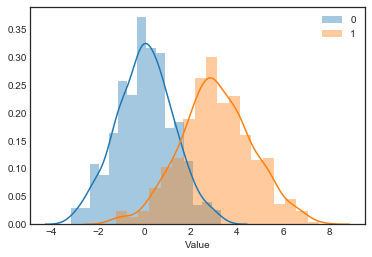

In [1133]:
#visualize distributions
sns.distplot(merged[merged["Class"]==0]["Value"],label="0")
sns.distplot(merged[merged["Class"]==1]["Value"],label="1")
plt.legend()

In [1108]:
#find the interception point of distributions
def interception(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])
result = interception(mu_0,mu_1,sigma_0,sigma_1)
result[1]

1.4659013923514714

In [1109]:
total_std = np.std(merged["Value"])

In [1110]:
#find tpr and fpr for thresholds between interception+-1.5*standard deviation of total distribution
tpr=[]
fpr=[]
for i in np.arange(result[1]-total_std*1.5,result[1]+total_std*1.5,0.4):
    pred_0=merged[merged["Value"]<i]
    pred_1=merged[merged["Value"]>i]
    truep=pred_1[pred_1["Class"]==1]
    falsep=pred_1[pred_1["Class"]==0]
    tpr.append(len(truep)/size)
    fpr.append(len(falsep)/size)
rate_dict={"FPR":fpr,"TPR":tpr}
rates=pd.DataFrame(rate_dict)

(0, 1)

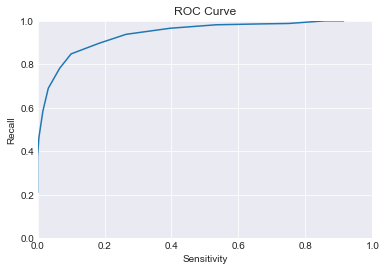

In [1111]:
#visualize the ROC curve
plt.plot(fpr,tpr)
plt.ylabel("Recall")
plt.xlabel("Sensitivity")
plt.title("ROC Curve")
plt.ylim(0,1)
plt.xlim(0,1)

In [1112]:
#get auc score
def get_auc(fpr,tpr):
    d_fpr = np.diff(fpr)
    d_tpr = np.diff(tpr)
    d_fpr = np.append(d_fpr,0)
    d_tpr = np.append(d_tpr,0)
    return(abs(sum(tpr*d_fpr)+sum(d_tpr*d_fpr)/2))

In [1113]:
#auc score
get_auc(fpr,tpr)

0.8538420000000001